# Pandas Series

- matplotlib, numpy, **pandas**, seaborn, scikit-learn, stats, scipy, ... 


## Some comparisons

______


- Numpy: Arrays
- Pandas: Series and Dataframes

___________ 

- Series: like a numpy array, but with some additional functionality. 


- Series: Imagine a single column of a table.  

- Dataframes: Imagine the entire table. 

______

How is a series different from a list? 

- Series contains an index, which can be thought of as a row name (often is a row number), which is a way to reference items. The index is stored with other meta-information (information about the series).   

- the elements are of a specific data type. The data type is inferred, but can be manually specified. 

_____ 



## Import Pandas

`import pandas as pd`

In [37]:
import pandas as pd
import numpy as np
from pydataset import data

## Create a Series

1. from a list
2. from a numpy array
3. from a dataframe

**From a List**

In [38]:
my_list = [2, 3, 5]
type(my_list)

list

In [58]:
# using index to access value in list is possible, but those indices are integers representing location and cannot be changed to be a name, datetime, etc. 
my_list[0]

2

In [39]:
# create series from list
my_series = pd.Series(my_list)

# Just as you would convert a list to an array with np
# my_array = np.array(my_list)

# what kind of python object is it? 
print(type(my_series))

<class 'pandas.core.series.Series'>


In [40]:
# what's inside the series? 
my_series

0    2
1    3
2    5
dtype: int64

- 3 rows, with the row indices (or row names) as [0, 1, 2]
- the values are [2, 3, 5]
- the datatype is int64 (i.e. will store LARGE integers ;))


**From an array**

In [41]:
my_array = np.array([8.0, 13.0, 21.0])

# create series from array
my_series = pd.Series(my_array)

type(my_series)

pandas.core.series.Series

In [42]:
my_series

0     8.0
1    13.0
2    21.0
dtype: float64

- 3 rows, with the row indices as [0, 1, 2]
- the values are [8.0, 13.0, 21.0]
- the datatype is float64

**From a dataframe**

In [43]:
my_df = data('sleepstudy')
my_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [46]:
# option 1 <dot>column_name:

my_series = my_df.Reaction
print(type(my_series))
# my_series

<class 'pandas.core.series.Series'>


In [47]:
# option 2: single bracket

my_series = my_df['Reaction']
print(type(my_series))

<class 'pandas.core.series.Series'>


In [54]:

my_dataframe_that_resembles_a_series = my_df[['Reaction']]
print(type(my_dataframe_that_resembles_a_series))

<class 'pandas.core.frame.DataFrame'>


In [55]:
my_series.head()

1    249.5600
2    258.7047
3    250.8006
4    321.4398
5    356.8519
Name: Reaction, dtype: float64

In [56]:
my_dataframe_that_resembles_a_series.head()

,Reaction
1,249.5600
2,258.7047
3,250.8006
4,321.4398
5,356.8519


### Summary

In [ ]:
# from list, array, dictionary
myseries = pd.Series(<list or array or dictionary>)

# from existing dataframe
myseries = df['col_for_series']
myseries = df.col_for_series

## Pandas data types

Data types you will see in series and dataframes: 

- int: integer, whole number values  
- float: decimal numbers  
- bool: true or false values  
- object: strings  
- category: a fixed set of string values  
- a name, an optional human-friendly name for the series  


1. inferring
2. using `astype()`

In [59]:
# inferring

pd.Series([True, False, True])

0     True
1    False
2     True
dtype: bool

In [60]:
pd.Series(['I', 'Love', 'Codeup'])

0         I
1      Love
2    Codeup
dtype: object

In [61]:
pd.Series([1, 3, 'five'])

0       1
1       3
2    five
dtype: object

In [69]:
my_series = pd.Series([1, 3, 'five'])

my_new_series = my_series[my_series != 'five']

my_new_series

0    1
1    3
dtype: object

In [ ]:
# `astype()`

my_new_series.astype('int')

my_series.astype('int') # will return error becuase can't convert 'five'to an int

# convert numeric type to string

In [76]:
subj_series = my_df['Subject'].astype('str')
subj_series

1      308
2      308
3      308
4      308
5      308
      ... 
176    372
177    372
178    372
179    372
180    372
Name: Subject, Length: 180, dtype: object

### Summary

- Pandas will infer datatypes
- You can change datatypes upon creating the series `pd.Series(mylist).astype('int')` or later using "astype(x)" where x can be 'float', 'int', 'str', e.g. `myseries.astype('str')`
- astype('str') will show the series dtype = object. 

## Vectorized Operations

- Like numpy arrays, pandas series are vectorized by default. E.g., we can easily use the basic arithmetic operators to manipulate every element in the series.

1. arithmetic operations
2. comparison operations

In [78]:
s1 = pd.Series([2, 3, 5, 8])

s1.head()

0    2
1    3
2    5
3    8
dtype: int64

In [79]:
s2 = my_df.Reaction
s2.head()

1    249.5600
2    258.7047
3    250.8006
4    321.4398
5    356.8519
Name: Reaction, dtype: float64

In [81]:
s1 + 1

0    3
1    4
2    6
3    9
dtype: int64

In [82]:
s1/2

0    1.0
1    1.5
2    2.5
3    4.0
dtype: float64

In [83]:
s1 >= 5

0    False
1    False
2     True
3     True
dtype: bool

In [84]:
(s1 >= 3) & (s1 % 2 == 0)

0    False
1    False
2    False
3     True
dtype: bool

### Summary

- Just as in Numpy, we can perform operations on each element in the series by simply applying the series, s + 1, s/2, s == 3, etc. and each will be evaluated. 

- a series is always returned
- a series of booleans if we are giving condition statements. 
- a series of transformed values if we are doing an arithmetic operation. 

## Series Methods

- `.any()`: returns a single boolean...do any values in the series meet the condition? 
- `.all()`: returns a single boolean...do all values in the series meet the condition? 
- `.head()`: returns the 1st 5 rows (max) of the series
- `.tail()`: returns the last 5 rows of the series
- `.value_counts()`: count number of records/items/rows containing each unique value (think "group by")
- `.isin()`: comparing string of each item in series to a list of strings. Is the string in your series found in the list of strings? Returns a series of boolean values. 

In [85]:
(s1 > 3).any()

True

In [86]:
(s1 > 3).all()

False

In [87]:
s1.head()

0    2
1    3
2    5
3    8
dtype: int64

In [88]:
s2.head()

1    249.5600
2    258.7047
3    250.8006
4    321.4398
5    356.8519
Name: Reaction, dtype: float64

In [89]:
s2.tail()

176    329.6076
177    334.4818
178    343.2199
179    369.1417
180    364.1236
Name: Reaction, dtype: float64

In [93]:
s3 = my_df.Days

s3.value_counts()

9    18
8    18
7    18
6    18
5    18
4    18
3    18
2    18
1    18
0    18
Name: Days, dtype: int64

```sql
select Days, count(Subject) from my_df group by Days;
```

Use `isin()` to tell whether each value is in a set of known values. 

In [96]:
vowels = list('aeiouy')
letters = list('abcdefghijkeliminnow')
letters_series = pd.Series(letters)
letters_series

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    e
12    l
13    i
14    m
15    i
16    n
17    n
18    o
19    w
dtype: object

In [100]:
s3.value_counts()
s3

1      0
2      1
3      2
4      3
5      4
      ..
176    5
177    6
178    7
179    8
180    9
Name: Days, Length: 180, dtype: int64

In [103]:
letters_series.isin(vowels).value_counts()

False    13
True      7
dtype: int64

### Descriptive stats

- `count()`
- `sum()`
- `mean()`
- `median()`
- `min()`
- `max()`
- `mode()`
- `abs()`
- `std()`
- `quantile()`

In [106]:
{
    'count': s2.count(),
    'sum': s2.sum(),
    'mean': s2.mean(),
    'median': s2.median()
    
}

{'count': 180,
 'sum': 53731.42049999999,
 'mean': 298.50789166666664,
 'median': 288.6508}

In [107]:
s2.describe()

count    180.000000
mean     298.507892
std       56.328757
min      194.332200
25%      255.375825
50%      288.650800
75%      336.752075
max      466.353500
Name: Reaction, dtype: float64

In [110]:
print(s1)
s1.describe()

0    2
1    3
2    5
3    8
dtype: int64


count    4.000000
mean     4.500000
std      2.645751
min      2.000000
25%      2.750000
50%      4.000000
75%      5.750000
max      8.000000
dtype: float64

### Functions

- `def myfcn()`
- `series.apply(lambda n: <myfuction>)`

In [111]:
def even_or_odd(n):
    '''
    this function takes a number and returns a string indicating 
    whether the passed number is even or odd
    '''
    if n % 2 == 0:
        return 'even'
    else:
        return 'odd'

s1.apply(even_or_odd)

0    even
1     odd
2     odd
3    even
dtype: object

In [112]:
s1.apply(lambda n: 'even' if n % 2 == 0 else 'odd')

0    even
1     odd
2     odd
3    even
dtype: object

## Vectorized String Operations

- `series.apply(lambda s: s.lower())` .... by why?? 
- `series.str.lower()`

Once we access the .str property, we can treat the resulting value as if it were a string. In our case, we called the .lower method, which will convert all the strings in the series to lower case.

In [118]:
s4 = pd.Series(['Zach', 'Ryan', 'John', 'Faith', 'Margaret'])

In [119]:
# s4.apply(lambda s: s.lower())
s4.str.lower()

0        zach
1        ryan
2        john
3       faith
4    margaret
dtype: object

In [121]:
s4 = s4.str.replace('rgaret', 'ggie')

In [122]:
s4

0      Zach
1      Ryan
2      John
3     Faith
4    Maggie
dtype: object

## Subsetting & Indexing

In [134]:
s2.describe()
# let's change the units from seconds to minutes for interpretability
s2_minutes = s2/60


# it's a series!
type(s2_minutes.describe())

s2_minutes.describe()['75%']

5.612534583333333

In [136]:
# find all where response time is > 3rd quartile
# identified the cutoff for 3rd to 4th quartile
q3 = s2_minutes.describe()['75%']

# subsetted our series to only those values that are in the 4th quartile
s2_minutes[s2_minutes > q3]

# created a new series that contained labels of 'q4' if the value 
# was above the 3rd q, or 'q1-q3' if not. 
s2_minutes.apply(lambda n: 'q4' if n > q3 else 'q1-q3')

1      q1-q3
2      q1-q3
3      q1-q3
4      q1-q3
5         q4
       ...  
176    q1-q3
177    q1-q3
178       q4
179       q4
180       q4
Name: Reaction, Length: 180, dtype: object

In [137]:
letters_series[letters_series.isin(vowels)]

0     a
4     e
8     i
11    e
13    i
15    i
18    o
dtype: object

## Numerical to Categorical Values - Binning & Cutting

`cut()` put numerical values into discrete bins. 

We can let pandas create bins of even intervals, or we can specify the bins to create. 

In [146]:
reaction_bins_auto_series = pd.cut(s2_minutes, 4)

In [147]:
reaction_bins_auto_series.value_counts()

(4.372, 5.506]    75
(3.234, 4.372]    53
(5.506, 6.639]    44
(6.639, 7.773]     8
Name: Reaction, dtype: int64

In [149]:
reaction_bins_series = pd.cut(s2_minutes, [3, 4, 5, 6, 7, 8])

In [150]:
reaction_bins_series.value_counts()

(4, 5]    74
(5, 6]    51
(3, 4]    28
(6, 7]    22
(7, 8]     5
Name: Reaction, dtype: int64

## Plotting

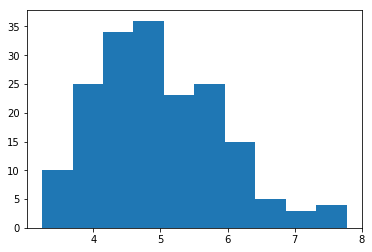

In [154]:
import matplotlib.pyplot as plt
plt.hist(s2_minutes)
plt.show()

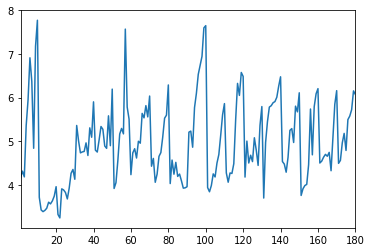

In [155]:
s2_minutes.plot()

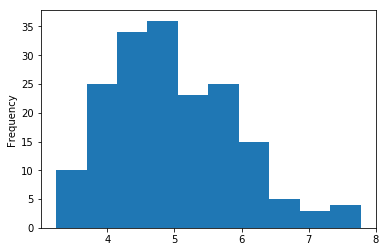

In [156]:
s2_minutes.plot.hist()

Text(0.5, 1.0, 'Reaction Time Bins')

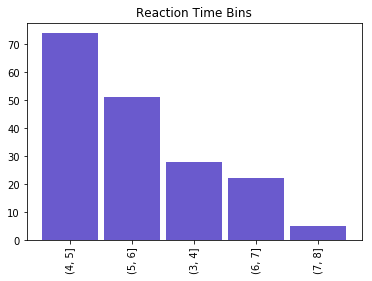

In [160]:
reaction_bins_series.value_counts().plot.bar(color='slateblue', width=.9)
plt.title('Reaction Time Bins')